# Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/chekirou/International-conflict-prediction/master/data/actual.csv'

In [2]:
df = pd.read_csv(url)

In [3]:
csv1 = pd.read_csv('../raw_data/csv1.csv')
csv2 = pd.read_csv('../raw_data/csv2.csv')
csv3 = pd.read_csv('../raw_data/csv3.csv')
csv4 = pd.read_csv('../raw_data/csv4.csv')
csv5 = pd.read_csv('../raw_data/csv5.csv')
csv6 = pd.read_csv('../raw_data/csv6.csv')

In [4]:
csv1['CountryYear'] = csv1['Country']+csv1['Year'].astype(str)
csv2['CountryYear'] = csv2['Country']+csv2['Year'].astype(str)
csv3['CountryYear'] = csv3['Country']+csv3['Year'].astype(str)
csv4['CountryYear'] = csv4['Country']+csv4['Year'].astype(str)
csv5['CountryYear'] = csv5['Country']+csv5['Year'].astype(str)
csv6['CountryYear'] = csv6['Country']+csv6['Year'].astype(str)

In [5]:
csv_12 = pd.merge(csv1,csv2,on='CountryYear',how='outer')
csv_123 = pd.merge(csv_12,csv3,on='CountryYear',how='outer')
csv_1234 = pd.merge(csv_123,csv4,on='CountryYear',how='outer')
csv_12345 = pd.merge(csv_1234,csv5,on='CountryYear',how='outer')
csv_full = pd.merge(csv_12345,csv6,on='CountryYear',how='outer')

csv_full

/var/folders/_s/vshzgsh90qdgm6zwx2gfmpv80000gn/T/ipykernel_56656/3997445115.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ContinentCode_x', 'Year_x', 'Country_x', 'Code_x'} in the result is deprecated and will raise a MergeError in a future version.
  csv_1234 = pd.merge(csv_123,csv4,on='CountryYear',how='outer')
/var/folders/_s/vshzgsh90qdgm6zwx2gfmpv80000gn/T/ipykernel_56656/3997445115.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ContinentCode_x', 'Year_x', 'Country_x', 'Code_x'} in the result is deprecated and will raise a MergeError in a future version.
  csv_full = pd.merge(csv_12345,csv6,on='CountryYear',how='outer')


,Country_x,Code_x,ContinentCode_x,Year_x,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Cost of living index world average = 100,Food price index world average = 100,Housing and utilities price index world average = 100,Healthcare price index world average = 100,...,Security threats index 0 (low) - 10 (high),Factionalized elites index 0 (low) - 10 (high),Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high)
0,Afghanistan,AFG,AS,1960.0,NaN,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,AS,1961.0,NaN,56.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,AS,1962.0,NaN,64.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,AS,1963.0,NaN,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,AS,1964.0,NaN,56.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
conflicts = pd.read_csv('../raw_data/conflict_data/conflict_data_1970.csv')

In [7]:
def get_year(row):
    
    year_value = row['CountryYear'][-4:]
    
    return int(year_value)

In [8]:
def get_country(row):
    
    country_name = row['CountryYear'][:-4]

    return country_name

In [9]:
csv_full['year_all'] = csv_full.apply(lambda x: get_year(x),axis=1)

In [10]:
csv_full['country_all'] = csv_full.apply(lambda x: get_country(x), axis=1)

# DELETING TINY PROVINCES/STATES

In [11]:
tiny_countries = ['Andorra','Antigua and Barbuda','Aruba','Belize','Bhutan','Brunei','Cape Verde','Comoros','Dominica','Kiribati',
                 'Micronesia','Montserrat','Palau','Saint Vincent and the Grenadines','Sao Tome and Principe','Solomon Islands','Taiwan',
                  'Tuvalu','Vanuatu','Euro area','Faroe Islands','Gibraltar','Macao','New Caledonia','San Marino','Norfolk Island','Holy See (Vatican City)']
csv_full = csv_full.set_index('country_all').drop(tiny_countries)
csv_full.reset_index(inplace=True)

In [12]:
csv_full['conflict_id'] =0
conflicts

csv_full[(csv_full['country_all']=='USA') & (csv_full['year_all']>1994)]

conflicts_1990 = conflicts[conflicts['Year']>1989]

In [13]:
my_list = []

def get_hist_data(country,year,lookback):
    
    early_year = lookback
    hist_data = csv_full[(csv_full['country_all']==country) & (csv_full['year_all'] <= (year -1)) & (csv_full['year_all'] > (year -1 - early_year))]
    while hist_data.shape[0] < lookback:
        early_year += 1
        
        hist_data = csv_full[(csv_full['country_all']==country) & (csv_full['year_all'] <= (year -1)) & (csv_full['year_all'] > (year -1 - early_year))]
    return hist_data

for index, row in conflicts_1990.iterrows():

    my_list.append(get_hist_data(row['Country'],row['Year'],5))


get_hist_data('USA',2010,10)    
    
len(my_list)
    

94

In [14]:
for i in range(len(my_list)):
    my_list[i]['conflict_id'] = i

/var/folders/_s/vshzgsh90qdgm6zwx2gfmpv80000gn/T/ipykernel_56656/729059741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_list[i]['conflict_id'] = i


In [15]:
for i in range(len(my_list)):
    if len(my_list[i]) < 5:
        print(i)

In [16]:
final_df = pd.DataFrame(columns=my_list[50].columns)

In [17]:
final_df

,country_all,Country_x,Code_x,ContinentCode_x,Year_x,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Cost of living index world average = 100,Food price index world average = 100,Housing and utilities price index world average = 100,...,Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),year_all,conflict_id


In [18]:
for i in range(len(my_list)):
    
    final_df = pd.concat([final_df,my_list[i]])

In [19]:
final_df.shape

(470, 117)

In [20]:
final_df

,country_all,Country_x,Code_x,ContinentCode_x,Year_x,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Cost of living index world average = 100,Food price index world average = 100,Housing and utilities price index world average = 100,...,Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),year_all,conflict_id
6348,Rwanda,Rwanda,RWA,AF,1985.0,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985,0
6349,Rwanda,Rwanda,RWA,AF,1986.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1986,0
6350,Rwanda,Rwanda,RWA,AF,1988.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988,0
9657,Rwanda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1987,0
9658,Rwanda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3938,Kazakhstan,Kazakhstan,KAZ,AS,2017.0,3.45,214.0,55.08,70.57,63.413,...,7.6,6.4,4.2,8.3,7.3,4.5,3.0,4.2,2017,93
3939,Kazakhstan,Kazakhstan,KAZ,AS,2018.0,4.65,310.0,NaN,NaN,NaN,...,7.9,5.9,3.9,8.4,7.0,4.2,2.7,3.9,2018,93
3940,Kazakhstan,Kazakhstan,KAZ,AS,2019.0,5.25,312.0,NaN,NaN,NaN,...,8.1,5.6,3.6,8.5,6.7,3.9,2.4,3.6,2019,93
3941,Kazakhstan,Kazakhstan,KAZ,AS,2020.0,4.56,268.0,NaN,NaN,NaN,...,8.2,5.3,3.3,8.5,6.4,3.6,2.3,3.3,2020,93


# Dropping features (70% rule)

In [21]:
final_df.shape

(470, 117)

In [22]:
to_drop  = pd.DataFrame(final_df.isna().sum()/470)
len(to_drop)

117

In [23]:
to_drop_list = to_drop[to_drop[0]>0.7].index.values.tolist()
len(to_drop_list)

26

In [24]:
for i in to_drop_list:
    final_df.drop(columns=i, axis=1, inplace=True)

In [25]:
final_df['CountryYear']

6348        Rwanda1985
6349        Rwanda1986
6350        Rwanda1988
9657        Rwanda1987
9658        Rwanda1989
             ...      
3938    Kazakhstan2017
3939    Kazakhstan2018
3940    Kazakhstan2019
3941    Kazakhstan2020
3942    Kazakhstan2021
Name: CountryYear, Length: 470, dtype: object

# Dropping data for the imputer

In [26]:
bin_list = ['Country_x','Code_x','Country_y','Year_x','Year_y','Code_y','ContinentCode_y','ContinentCode_x','Christians as percent of the total population']
final_df.head()

,country_all,Country_x,Code_x,ContinentCode_x,Year_x,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Human Development Index (0 - 1),CountryYear,Country_y,...,Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),year_all,conflict_id
6348,Rwanda,Rwanda,RWA,AF,1985.0,NaN,3.0,NaN,Rwanda1985,Rwanda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985,0
6349,Rwanda,Rwanda,RWA,AF,1986.0,NaN,2.0,NaN,Rwanda1986,Rwanda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1986,0
6350,Rwanda,Rwanda,RWA,AF,1988.0,NaN,2.0,NaN,Rwanda1988,Rwanda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988,0
9657,Rwanda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rwanda1987,Rwanda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1987,0
9658,Rwanda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rwanda1989,Rwanda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989,0


In [27]:
cleaner_df = final_df.drop(columns=bin_list)

In [28]:
cleaner_1985 = cleaner_df[cleaner_df['year_all']>1984]

imputer_drops = ['Homicides per 100000 people','Real interest rate: Bank lending rate minus inflation','Public spending on education percent of GDP',
                 'Shadow economy percent of GDP','Suicide mortality rate per 100000 population',
                 'Government debt as percent of GDP','Fiscal balance percent of GDP','Access to electricity percent of the population']






In [29]:
cleaner_df = cleaner_df.drop(columns=imputer_drops)

In [30]:
(cleaner_1985.isna().sum()/cleaner_1985.shape[0]).sort_values()[40:60]

Regulatory quality index (-2.5 weak; 2.5 strong)            0.319149
Voice and accountability index (-2.5 weak; 2.5 strong)      0.319149
Political stability index (-2.5 weak; 2.5 strong)           0.319149
Arms imports million constant U.S. dollars                  0.321277
Freedom from corruption index (0-100)                       0.325532
Military spending percent of total government spending      0.340426
Government debt as percent of GDP                           0.353191
Economic freedom overall index (0-100)                      0.355319
Suicide mortality rate per 100000 population                0.380851
Corruption Perceptions Index 100 = no corruption            0.417021
Banking system z-scores                                     0.429787
Labor freedom index (0-100)                                 0.434043
Factionalized elites index 0 (low) - 10 (high)              0.438298
Group grievance index 0 (low) - 10 (high)                   0.438298
Economic decline index 0 (low) - 1

In [31]:
cleaner_df['conflict_id']=cleaner_df['conflict_id'].astype(int)

In [32]:
cleaner_df

,country_all,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Human Development Index (0 - 1),CountryYear,Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,Capital investment as percent of GDP,Inflation: percent change in the Consumer Price Index,...,Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),year_all,conflict_id
6348,Rwanda,NaN,3.0,NaN,Rwanda1985,4.40,279.10,NaN,17.31,1.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985,0
6349,Rwanda,NaN,2.0,NaN,Rwanda1986,5.47,301.80,NaN,15.87,-1.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1986,0
6350,Rwanda,NaN,2.0,NaN,Rwanda1988,4.50,337.96,NaN,14.49,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988,0
9657,Rwanda,NaN,NaN,NaN,Rwanda1987,-0.02,318.21,NaN,15.66,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1987,0
9658,Rwanda,NaN,NaN,NaN,Rwanda1989,-0.04,330.50,NaN,13.43,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3938,Kazakhstan,3.45,214.0,0.813,Kazakhstan2017,4.10,9247.58,24862.97,26.35,7.4,...,7.6,6.4,4.2,8.3,7.3,4.5,3.0,4.2,2017,93
3939,Kazakhstan,4.65,310.0,0.817,Kazakhstan2018,4.10,9812.63,25544.35,25.26,6.0,...,7.9,5.9,3.9,8.4,7.0,4.2,2.7,3.9,2018,93
3940,Kazakhstan,5.25,312.0,0.817,Kazakhstan2019,4.50,9812.60,26351.80,27.63,5.2,...,8.1,5.6,3.6,8.5,6.7,3.9,2.4,3.6,2019,93
3941,Kazakhstan,4.56,268.0,0.825,Kazakhstan2020,-2.50,9121.64,25361.51,28.52,6.7,...,8.2,5.3,3.3,8.5,6.4,3.6,2.3,3.3,2020,93


# Grouping the data


In [33]:
grouped_df = cleaner_df.groupby(by='conflict_id').mean()

/var/folders/_s/vshzgsh90qdgm6zwx2gfmpv80000gn/T/ipykernel_56656/2490057627.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = cleaner_df.groupby(by='conflict_id').mean()


In [34]:
grouped_df.columns

Index(['Military spending percent of total government spending ',
       'Arms imports million constant U.S. dollars',
       'Human Development Index (0 - 1)',
       'Economic growth: the rate of change of real GDP',
       'GDP per capita current U.S. dollars',
       'GDP per capita Purchasing Power Parity',
       'Capital investment as percent of GDP',
       'Inflation: percent change in the Consumer Price Index',
       'Unemployment rate', 'Youth unemployment ages 15-24',
       'Labor force participation rate',
       'Trade openness: exports plus imports as percent of GDP',
       'Foreign Direct Investment percent of GDP',
       'Trade balance as percent of GDP',
       'External debt percent of Gross National Income',
       'Government spending as percent of GDP',
       'Foreign aid and official development assistance received',
       'Rule of law index (-2.5 weak; 2.5 strong)',
       'Government effectiveness index (-2.5 weak; 2.5 strong)',
       'Control of corrupt

# Create the control dataset

In [35]:
conflict_years = final_df['CountryYear']

In [36]:
csv4_after_1980 = csv_full[csv_full['year_all'] > 1985]
csv4_after_1980_noconflict = csv4_after_1980[csv4_after_1980.CountryYear.isin(conflict_years)==False]
csv4_after_1980.shape[0] - csv4_after_1980_noconflict.shape[0]

437

In [37]:
def slice_fn(sample):
    year = int(sample[-4:])
    words = [sample[:-4]+str(year-i-1) for i in range(4)]
    words.append(sample)
    return words

In [38]:
from itertools import chain

sample_list = []

control_sample = csv4_after_1980.sample(270,random_state=24)

for index,row in control_sample.iterrows():
    sample_list.append(get_hist_data(row['country_all'],row['year_all'],5))

sample_full = sample_list[0]

for i in range(1,len(sample_list)):
    
    sample_full = pd.concat([sample_full,sample_list[i]])

In [39]:
id_list = list(range(95,365))*5

In [40]:
id_list = sorted(id_list)

In [41]:
sample_full['conflict_id'] = id_list
sample_full['country_all'].unique()

array(['Dominican Republic', 'Poland', 'Tonga', 'Tajikistan', 'Hungary',
       'Iraq', 'Honduras', 'Germany', 'Netherlands', 'Rwanda', 'Eritrea',
       'Bahamas', 'Guatemala', 'Panama', 'Laos', 'Thailand', 'Senegal',
       'Sierra Leone', 'Syria', 'Maldives', 'Peru', 'Qatar',
       'New Zealand', 'El Salvador', 'Malta', 'Cuba', 'Australia',
       'Portugal', 'Barbados', 'Bermuda', 'Gabon', 'Czechia', 'Palestine',
       'Montenegro', 'Ethiopia', 'Uzbekistan', 'Croatia', 'Kyrgyzstan',
       'Lesotho', 'Jordan', 'Sweden', 'Georgia', 'Sri Lanka',
       'United Arab Emirates', 'Kuwait', 'Liberia', 'Turkey', 'Colombia',
       'Tunisia', 'Nicaragua', 'Central African Republic', 'Gambia',
       'Madagascar', 'Philippines', 'Mali', 'Angola', 'Malawi', 'Niger',
       'Botswana', 'Samoa', 'Burma (Myanmar)', 'Djibouti', 'USA',
       'Iceland', 'Oman', 'France', 'Costa Rica', 'Burkina Faso',
       'Venezuela', 'Saudi Arabia', 'Ivory Coast', 'Bangladesh', 'Fiji',
       'Mozambique', 'U

In [42]:
control_groupedby = sample_full.groupby('conflict_id').mean()

/var/folders/_s/vshzgsh90qdgm6zwx2gfmpv80000gn/T/ipykernel_56656/3478027142.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  control_groupedby = sample_full.groupby('conflict_id').mean()


In [43]:
columns_to_keep = list(grouped_df.columns)

In [44]:
sample_full_clean = control_groupedby.drop(columns=[col for col in control_groupedby if col not in columns_to_keep])

sample_full_clean.isna().sum()

sample_full_clean

,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Human Development Index (0 - 1),Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,Capital investment as percent of GDP,Inflation: percent change in the Consumer Price Index,Unemployment rate,Youth unemployment ages 15-24,...,Security threats index 0 (low) - 10 (high),Factionalized elites index 0 (low) - 10 (high),Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high)
conflict_id,,,,,,,,,,,,,,,,,,,,,
95,6.4180,6.250000,0.6500,5.732,2722.842,8940.354,26.3880,7.240,6.550,12.606,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,4.0500,270.200000,0.8326,3.370,13022.386,24017.498,22.1240,3.680,8.930,22.664,...,2.40,3.58,3.40,4.48,4.72,4.20,3.66,4.50,3.14,3.98
97,NaN,0.000000,0.6680,2.016,2128.126,4877.708,20.9120,3.840,3.256,8.446,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,5.400,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,2.6540,107.800000,0.8080,2.908,12548.978,24915.958,25.8880,5.640,7.148,18.086,...,2.00,5.40,3.20,4.20,6.20,5.85,4.00,3.70,3.50,4.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,5.9880,962.200000,0.8348,4.204,20414.704,33997.328,25.1360,3.340,9.738,25.504,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,4.7960,38.250000,0.7352,9.820,3132.660,15331.510,28.8340,7.080,8.486,13.778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,3.9640,276.800000,0.4974,1.532,505.058,2036.974,NaN,3.075,11.284,17.220,...,9.98,8.66,8.08,8.40,7.60,9.06,8.18,9.26,9.62,9.34


In [45]:
# sample_full_clean

# sara_conflict = pd.read_csv('imputed_final_df.csv',index_col=0)
# sara_control = pd.read_csv('imputed_control.csv')


# test_sara_conflict_ali_control = pd.concat([sara_conflict,imputed_control_df])
# test_sara_control_ali_conflict = pd.concat([imputed_conflict_df,sara_control])

# Merging dataset and imputing all


In [46]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=0, missing_values=np.nan)
imputer2 = IterativeImputer(max_iter=10, random_state=0, missing_values=np.nan)

grouped_df['target'] = 1
sample_full_clean['target'] = 0

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']


full_dataset = pd.concat([grouped_df,sample_full_clean])

In [47]:
data_numeric = full_dataset.select_dtypes(include=numerics)

imputer.fit(data_numeric)
imputed_final_df = pd.DataFrame(imputer.transform(data_numeric),columns=full_dataset.columns)
imputed_final_df.head()

,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Human Development Index (0 - 1),Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,Capital investment as percent of GDP,Inflation: percent change in the Consumer Price Index,Unemployment rate,Youth unemployment ages 15-24,...,Factionalized elites index 0 (low) - 10 (high),Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),target
0,12.673710,2.333333,0.324713,2.862,313.514,-1467.848468,15.352,1.760000,9.021425,14.069799,...,8.795742,7.955084,9.736866,8.798828,8.936518,8.510355,10.074332,8.245304,9.619262,1.0
1,8.053341,16.000000,0.354197,3.200,823.864,296.098927,13.258,2.740000,8.174191,14.152808,...,6.480467,7.365265,8.632243,8.666493,6.393737,6.249452,9.178526,6.923863,8.535519,1.0
2,10.390000,122.200000,0.325157,3.308,257.922,-3542.673206,15.868,7.766667,6.171296,10.986067,...,8.368162,8.764572,9.503269,9.135024,7.637241,7.412264,10.013765,8.301991,9.821576,1.0
3,11.231251,2.000000,0.324085,4.888,174.638,-3479.452307,21.562,11.140000,7.196317,11.717134,...,8.428817,8.401358,9.756115,8.846725,7.845227,7.274348,9.776745,7.831085,9.653920,1.0
4,7.318134,36.439218,0.634824,-4.666,1614.640,11135.460000,29.614,206.469116,5.892189,12.203343,...,6.467375,6.227874,5.293147,7.301326,7.139952,5.969640,7.077190,5.765635,5.817825,1.0


In [48]:
#  data_numeric2 = grouped_df.select_dtypes(include=numerics)

# imputed_conflict_df = pd.DataFrame(imputer2.fit_transform(data_numeric2),columns=data_numeric2.columns)
# imputed_control_df = pd.DataFrame(imputer2.fit_transform(sample_full_clean),columns=data_numeric2.columns)

In [49]:
# imputed_control_df

In [50]:
# separate_impute_full_df = pd.concat([imputed_control_df,imputed_conflict_df])
# separate_impute_full_df['target'] = separate_impute_full_df['target'].astype(int)
# separate_impute_full_df
# imputed_final_df

In [51]:
# scaler2 = MinMaxScaler()
# separate_scaled = pd.DataFrame(scaler2.fit_transform(separate_impute_full_df), columns=separate_impute_full_df.columns)

# X2 = separate_scaled.drop(columns=['target'])
# y2 = separate_scaled['target']
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2,test_size = 0.3, random_state=5)



In [52]:
# bst2 = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# bst2.fit(X_train2, y_train2)

In [53]:
# preds2 = bst2.predict(X_test2)

# accuracy_score(preds2,y_test2)

In [54]:
# print(imputed_final_df.shape)
# imputed_final_df.columns

imputed_final_df.describe()

,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Human Development Index (0 - 1),Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,Capital investment as percent of GDP,Inflation: percent change in the Consumer Price Index,Unemployment rate,Youth unemployment ages 15-24,...,Factionalized elites index 0 (low) - 10 (high),Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),target
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,...,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,8.827387,193.962706,0.614032,3.423041,8580.463124,15138.071770,23.091479,111.814262,7.833805,15.985324,...,6.824898,6.473227,6.122637,6.953508,7.017065,6.483306,7.072023,5.912770,6.442473,0.258242
std,6.143155,399.373217,0.178059,3.838449,16133.766808,19129.623119,6.839083,631.933367,5.822910,11.526654,...,2.200457,1.837051,2.732389,1.508484,2.161733,1.974193,1.894802,2.064741,2.650526,0.438270
min,-10.268318,-958.432328,0.189464,-20.620000,125.954000,-4262.967897,0.000000,-308.500006,0.256000,0.870000,...,-0.352091,1.400000,-11.940406,1.320000,0.860000,1.000000,1.580000,0.191159,-5.588057,0.000000
25%,4.442917,6.250000,0.466950,1.911000,746.605000,3278.610081,18.982136,2.720000,3.899426,7.761500,...,5.790237,5.286347,4.716158,6.195000,6.060000,5.308637,5.715060,4.603472,5.118750,0.000000
50%,7.594392,52.225000,0.645800,3.417000,2409.231000,8574.622000,22.743000,5.630000,6.584897,13.267000,...,7.255985,6.581419,6.556211,7.262234,7.345944,6.742540,7.295895,6.029533,6.643000,0.000000
75%,11.832497,208.000000,0.753563,5.277000,8410.470670,17838.453461,27.151500,15.350000,9.490981,20.688236,...,8.318199,7.886440,7.884759,7.959606,8.345000,8.005000,8.539049,7.329763,8.266407,1.000000
max,35.752500,3218.400000,0.926008,18.674000,117234.912000,115204.094000,48.846000,6517.100000,33.818000,70.086000,...,17.305877,10.068775,12.151341,9.640000,15.665418,9.900000,10.910501,12.408437,19.789475,1.000000


# Scaler on whole dataset

In [55]:
from sklearn.preprocessing import MinMaxScaler

# LET'S MODEL

In [56]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
model_drops = ['Capital investment as percent of GDP','GDP per capita Purchasing Power Parity','Refugee population',
                'Labor freedom index (0-100)','Corruption Perceptions Index 100 = no corruption', 'Youth unemployment ages 15-24','Economic decline index 0 (low) - 10 (high)',
                 'Freedom from corruption index (0-100)','Food production index (2004-2006 = 100)','Social globalization index (0-100)',
                 'Banking system z-scores','Population size in millions', 'Rural population percent of total population','Population growth percent',
                 'Internet users percent of population','External debt percent of Gross National Income'
                ]

imputed_final_df.drop(columns=model_drops,inplace=True)

scaler = MinMaxScaler()
scaler.fit(imputed_final_df)
full_dataset_scaled = pd.DataFrame(scaler.transform(imputed_final_df), columns=imputed_final_df.columns)


X = full_dataset_scaled.drop(columns='target')
y = full_dataset_scaled['target']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=5)




In [57]:
y_train.value_counts()

0.0    191
1.0     63
Name: target, dtype: int64

In [58]:
bst = XGBClassifier(n_estimators=100,max_depth=30,learning_rate=1, 
                    objective='binary:logistic')

In [59]:
bst.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=30, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [60]:
preds = bst.predict(X_test)

accuracy_score(preds,y_test)
bst.predict_proba(X_test)
accuracy_score(preds,y_test)


0.6818181818181818

In [61]:
import pandas as pd

features = bst.get_booster().feature_names
importances = bst.feature_importances_
feature_importances_df = pd.DataFrame(zip(features, importances), columns=['feature', 'importance']).set_index('feature')
feature_importances_df.sort_values('importance', ascending=False).head(20).keys





<bound method NDFrame.keys of                                                     importance
feature                                                       
Rule of law index (-2.5 weak; 2.5 strong)             0.178521
Globalization index (0-100)                           0.080393
Political rights index 7 (weak) - 1 (strong)          0.067691
Refugees and displaced persons index 0 (low) - ...    0.057587
Demographic pressures 0 (low) - 10 (high)             0.057364
Foreign Direct Investment percent of GDP              0.049291
Control of corruption (-2.5 weak; 2.5 strong)         0.045361
Factionalized elites index 0 (low) - 10 (high)        0.038486
Regulatory quality index (-2.5 weak; 2.5 strong)      0.037225
Inflation: percent change in the Consumer Price...    0.037138
GDP per capita current U.S. dollars                   0.033024
Economic growth: the rate of change of real GDP       0.031469
Political globalization index (0-100)                 0.029137
Foreign aid and official 

In [62]:
feature_importances_df.sort_values('importance', ascending=False).tail(20)


,importance
feature,
Military spending percent of total government spending,0.018798
Government spending as percent of GDP,0.018273
Labor force participation rate,0.014628
Trade balance as percent of GDP,0.013216
Human Development Index (0 - 1),0.012497
Uneven economic development index 0 (low) - 10 (high),0.010954
Arms imports million constant U.S. dollars,0.010650
Security threats index 0 (low) - 10 (high),0.009978
Trade openness: exports plus imports as percent of GDP,0.008988


In [63]:
def get_imputed_df(country,year,lookback=5):
    df = get_hist_data(country,year,lookback).groupby('country_all').mean(numeric_only=True)
    df.drop(columns=[col for col in df if col not in columns_to_keep],inplace=True)
    df['target'] = 0.5
    imputed_df = pd.DataFrame(imputer.transform(df),columns=df.columns)
    imputed_df.drop(columns=model_drops,inplace=True)
    
    
    return imputed_df




def get_prob(country,year,lookback=5):
    df = get_imputed_df(country,year,lookback)
    scaled_df = pd.DataFrame(scaler.transform(df),columns=df.columns)
    scaled_df.drop(columns='target',inplace=True)
    prob = bst.predict_proba(scaled_df)[0][1]
    return prob

def prob_series(country,start_year,end_year,lookback=5):
    my_list =[]
    for year in range(start_year,end_year+1):
        my_list.append(get_prob(country,year,lookback))
    return my_list


    
prob_series('USA',1990,2020)
get_imputed_df('Iran',2019)


,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Human Development Index (0 - 1),Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,Inflation: percent change in the Consumer Price Index,Unemployment rate,Labor force participation rate,Trade openness: exports plus imports as percent of GDP,Foreign Direct Investment percent of GDP,...,Security threats index 0 (low) - 10 (high),Factionalized elites index 0 (low) - 10 (high),Group grievance index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),target
0,15.084,89.4,0.7944,2.578,5395.586,12.46,11.778,42.388,45.656,0.69,...,7.74,9.52,8.94,5.9,9.0,9.36,5.14,6.54,6.7,0.5


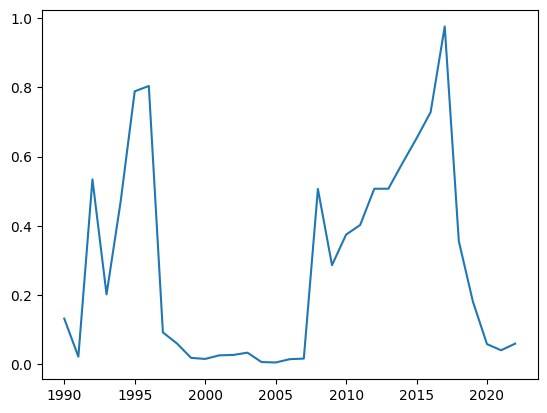

In [64]:

def plot_prob_series(country,start_year,end_year,lookback=5):
    
    sns.lineplot(x = list(range(start_year,end_year+1)),y=prob_series(country,start_year,end_year,lookback))
    
plot_prob_series('Mozambique',1990,2022)




In [65]:
codes = pd.read_csv('../raw_data/country_code_example.csv')


def lambda_prob(row):
    
    prob_value = get_prob(row['Country from our model'],2021)
    
    return prob_value

code_dict = pd.Series(codes['Country from our model'].values,index=codes.Code).to_dict()

codes2 = codes[['Country from our model', 'Code']].dropna()

codes2['prob'] = codes2.apply(lambda x: lambda_prob(x),axis=1)
# codes2
# codes2['next_year_prob'] = get_prob(codes2['Country from our model'],2022)

codes2 = codes[['Country from our model', 'Code']].dropna()
codes2

,Country from our model,Code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,Angola,AGO
4,Argentina,ARG
...,...,...
170,Venezuela,VEN
171,Vietnam,VNM
172,Yemen,YEM
173,Zambia,ZMB


In [66]:

def get_year_probs(year):
    def lambda_prob(row):
    
        prob_value = get_prob(row['Country from our model'],year)
    
        return prob_value
    codes3 = codes[['Country from our model', 'Code']].dropna()
    
    codes3[year] = codes3.apply(lambda x: lambda_prob(x),axis=1)
    return codes3

get_year_probs(1990)

time_series_probs = [get_year_probs(i) for i in range(1990,2023)]


In [67]:
time_series_large = time_series_probs[0]

for i in range(1,len(time_series_probs)):
    time_series_large = pd.merge(time_series_large,time_series_probs[i],on=['Country from our model','Code'])



In [68]:
time_series_large

,Country from our model,Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,AFG,0.650604,0.919521,0.995149,0.996202,0.993900,0.993900,0.998906,0.999510,...,0.946455,0.923209,0.974668,0.858925,0.969088,0.982567,0.958713,0.790764,0.132801,0.157499
1,Albania,ALB,0.111671,0.013746,0.099042,0.173032,0.063207,0.010214,0.000305,0.000330,...,0.180384,0.005843,0.005843,0.007806,0.007806,0.006082,0.006082,0.004157,0.001522,0.001522
2,Algeria,DZA,0.393733,0.991925,0.870385,0.867868,0.943126,0.558191,0.051543,0.050987,...,0.343829,0.169640,0.848932,0.960575,0.995586,0.938894,0.983924,0.959159,0.967494,0.967494
3,Angola,AGO,0.010971,0.003741,0.005054,0.008830,0.008697,0.086566,0.121270,0.582210,...,0.698328,0.791835,0.783389,0.560207,0.454595,0.167125,0.010861,0.381884,0.123725,0.014379
4,Argentina,ARG,0.145895,0.077602,0.094565,0.153162,0.461937,0.256694,0.685801,0.787533,...,0.071011,0.037457,0.786415,0.836756,0.922339,0.811476,0.811476,0.853112,0.853690,0.143033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,Venezuela,VEN,0.005994,0.010321,0.007168,0.007168,0.002815,0.001409,0.713127,0.022054,...,0.863399,0.980890,0.969080,0.989115,0.995346,0.997396,0.978973,0.903038,0.954409,0.913262
171,Vietnam,VNM,0.998062,0.441872,0.500391,0.334155,0.124275,0.154260,0.141014,0.136997,...,0.032211,0.103272,0.479947,0.212452,0.175606,0.080751,0.108957,0.453097,0.339083,0.337795
172,Yemen,YEM,0.319158,0.995358,0.908633,0.502766,0.970014,0.845084,0.157922,0.125061,...,0.985489,0.985391,0.991690,0.850173,0.798910,0.766943,0.726202,0.009595,0.014307,0.020115
173,Zambia,ZMB,0.289133,0.031902,0.226162,0.021601,0.016038,0.002909,0.000457,0.000452,...,0.009100,0.007369,0.009904,0.085943,0.064168,0.013079,0.017673,0.009573,0.048800,0.048800


In [69]:
time_series_probs[10]

,Country from our model,Code,2000
0,Afghanistan,AFG,0.992490
1,Albania,ALB,0.000272
2,Algeria,DZA,0.177273
3,Angola,AGO,0.725890
4,Argentina,ARG,0.819864
...,...,...,...
170,Venezuela,VEN,0.002192
171,Vietnam,VNM,0.035856
172,Yemen,YEM,0.932638
173,Zambia,ZMB,0.000811


<AxesSubplot: >

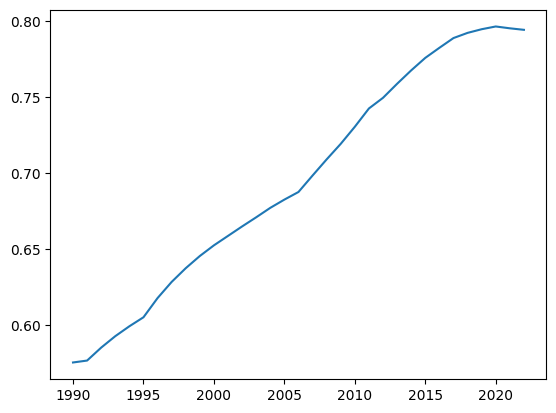

In [70]:
def plot_feature_series(country,feature,lookback=5):
    years = list(range(1990,2023))
    series = [get_imputed_df(country, i, lookback)[feature][0] for i in years]
    return sns.lineplot(x=years,y=series)


plot_feature_series('Iran','Human Development Index (0 - 1)')

# Downloading the data

In [71]:
csv_full['year_all'] = csv_full.apply(lambda x: get_year(x),axis=1)

In [72]:
time_series_large.to_csv('sara.csv')

In [73]:
# KEEP DOING FEATURE STUFF
# AUTOML LATER.. look at optimising over f1 and recall
# Run over a few random states to find good one
# look at a couple exmaples that are interesting over time (either by big changes in prob or unexpected countries)
# NLP on UN speeches
# 

In [74]:
list_of_full_dfs = []

for country in codes2['Country from our model']:
    df = get_imputed_df(country,1990)
    df['country'] = country
    df['year'] = 1990
    list_of_full_dfs.append(df)





In [75]:
list_of_full_dfs[0]

,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Human Development Index (0 - 1),Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,Inflation: percent change in the Consumer Price Index,Unemployment rate,Labor force participation rate,Trade openness: exports plus imports as percent of GDP,Foreign Direct Investment percent of GDP,...,Group grievance index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),target,country,year
0,17.466209,839.8,0.307984,3.221004,7082.817249,83.892004,8.103046,66.16197,63.039999,8.764906,...,7.591488,8.126667,8.084613,8.853129,9.890322,8.115059,10.47718,0.5,Afghanistan,1990


In [76]:
len(list_of_full_dfs)

175

In [77]:
list_of_fuller_dfs = []

In [78]:
for df in list_of_full_dfs:
    
    country = df['country'][0]
    for year in range(1991,2023):
        new_year_df = get_imputed_df(country,year)
        new_year_df['country'] = country
        new_year_df['year'] = year
        
        df = pd.concat([df,new_year_df])
        
    list_of_fuller_dfs.append(df)
        
        
        

In [79]:
monster_df= list_of_fuller_dfs[0]

for i in range(1,len(list_of_fuller_dfs)):
    monster_df = pd.concat([monster_df,list_of_fuller_dfs[i]])




In [80]:
list_of_full_dfs[1]

,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Human Development Index (0 - 1),Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,Inflation: percent change in the Consumer Price Index,Unemployment rate,Labor force participation rate,Trade openness: exports plus imports as percent of GDP,Foreign Direct Investment percent of GDP,...,Group grievance index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),target,country,year
0,15.283532,262.93259,0.62228,3.01,671.86,181.318019,5.437644,60.718336,35.34,0.0,...,7.542543,7.562482,9.259623,8.972508,7.411291,6.563749,7.345736,0.5,Albania,1990


In [81]:
monster_df.to_csv('full_feature_set.csv')

In [82]:
monster_df.describe()

,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Human Development Index (0 - 1),Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,Inflation: percent change in the Consumer Price Index,Unemployment rate,Labor force participation rate,Trade openness: exports plus imports as percent of GDP,Foreign Direct Investment percent of GDP,...,Factionalized elites index 0 (low) - 10 (high),Group grievance index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),target,year
count,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,...,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.0,5775.000000
mean,8.337539,159.513729,0.647066,3.491942,11147.828751,57.592663,8.244705,61.976465,84.920107,7.160169,...,6.294755,6.032064,6.723476,6.438502,5.979846,6.659001,5.457233,6.147352,0.5,2006.000000
std,6.197089,371.172148,0.175576,4.126738,19770.985532,295.296710,6.141616,11.512753,54.961911,36.303313,...,2.387307,1.863117,1.685003,2.271092,2.144943,2.045459,2.068792,2.504017,0.0,9.522729
min,-20.073567,-1758.126202,0.087983,-42.450000,37.644000,-893.756932,-0.938109,19.350746,0.522000,-350.375000,...,-4.475269,-3.954921,-3.122967,-0.344933,-2.634926,0.275162,-1.380188,-7.319297,0.5,1990.000000
25%,3.949000,7.000000,0.511775,1.756000,894.486000,2.240000,3.951000,55.219000,51.494000,0.852000,...,4.900000,4.800000,5.880000,5.220000,4.498108,5.327099,3.950151,4.536770,0.5,1998.000000
50%,7.096667,40.250000,0.673500,3.482000,3463.352000,5.220000,6.886535,61.248000,74.108000,2.342000,...,6.743834,6.100000,7.103914,6.900000,6.267761,6.936393,5.600000,6.304524,0.5,2006.000000
75%,11.372394,180.700000,0.785700,5.181000,11596.194743,12.710000,10.359000,68.549667,101.034000,4.919000,...,7.997900,7.360000,7.901184,8.088494,7.620000,8.240000,6.875780,7.860000,0.5,2014.000000
max,55.020000,3967.000000,1.074551,56.838000,179167.750000,6517.100000,37.402000,127.866839,484.627461,799.310000,...,25.072115,10.923599,13.772916,15.671865,10.000000,11.361729,17.618659,29.792889,0.5,2022.000000
